<hr/>

# Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 1: Intro to Python and two problems on probability</font></h1>



##  Content
1. Jupyter and Jupyterhub
2. Python basic
3. Library installation
4. Lab Problems

### 1. Jupyter and Jupyterhub
#### 1.1 Jupyter

Jupyter is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text, (see https://jupyter.org/). To naviagate through Jupyter devalopment environment, see [Notebook Basic](https://github.com/ipython/ipython-in-depth/blob/7e5ce96cc9251083979efdfc393425f1229a4a68/examples/Notebook/Notebook%20Basics.ipynb).

#### 1.2 Jupyterhub
You are currently viewing a Jupyter Notebook file running remotely on Jupyterhub of this class. Jupyterhub basically has the same features as Jupyter but saving and executing your code in the cloud. Therefore, you could avoid python & jupyter installation tasks and access relatively high computational power.

#### 1.3 [Optional] Install Jupyter on your computer
If you prefer to have Jupyter on your computer and run codes offline (e.g. you don't have a stable internet connection), try<br>
[Install Python](https://www.python.org/downloads/) <br>
[Install Anaconda](https://www.anaconda.com/distribution/#download-section)

### 2. Python basic
Python is the programming language we use for this course. If Python seems unfamiliar to you, [Python tutorial](https://cs231n.github.io/python-numpy-tutorial/) may give you a quick start.

### 3 Library Installation
You can add libraries to the Jupyter/Jupyterhub devalopment environment by the following steps:

#### Step 1. Call pip to install
Run the following code

In [1]:
!pip install numpy
!pip install matplotlib

#### Step 2. Add system path (needed only for the first time you add library)
Run the following code

In [3]:
import sys
sys.path.append('/Users/alecportelli/anaconda3/envs/en685621/lib/python3.9/site-packages')
# If you don't know the file directory:
#   Run step 1 again you might see the file directory
#   For the course Jupyterhub it should be /home/**FILL IN YOUR USER NAME**/.local/lib/python3.6/site-packages

### 4. Lab Problems

In [4]:
%matplotlib inline 

import numpy as np 
import matplotlib.pyplot as plt  
# import useful libraries

### Problem 1

Given the following mixture of two Gaussians,

$\displaystyle \qquad f(x) = \frac{4}{5\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) + \frac{1}{10\sqrt{2\pi}} \exp\left(-\frac{(x-3)^2}{8}\right)$,


1. Plot the distribution function $f(x)$; (1 pts)
2. Calculate the mean and variance of the given mixture of two Gaussians; (2 pts)
0. Sample 1000000 values from the given mixture of two Gaussians; (3 pts)
0. Plot a distribution histgram of your sampled values. (3 pts)
0. Show the mean and variance of your sampled values. (1 pts)

Total of 10 points

### Soulution:
#### 1.

In [49]:
''' SUPPORTING FUNCTIONS TO CALCULATE MIXED GAUSSIAN '''

# Break up the terms for easier readability
FIRST_TERM = 4/(5*np.sqrt(2*np.pi))
SECOND_TERM = 1/(10*np.sqrt(2*np.pi))

# Function to calculate the Gaussian 
def CalculateMixedGaussian(x):
    # Loop through to calculate 
    result = (FIRST_TERM * np.exp(FirstFunction(x))) + (SECOND_TERM * np.exp(SecondFunction(x)))
    return result

# Handles the first function component 
def FirstFunction(x):
    return (-x**2 / 2)

# Handles the second function component 
def SecondFunction(x):
    return -((x - 3)**2) / 8

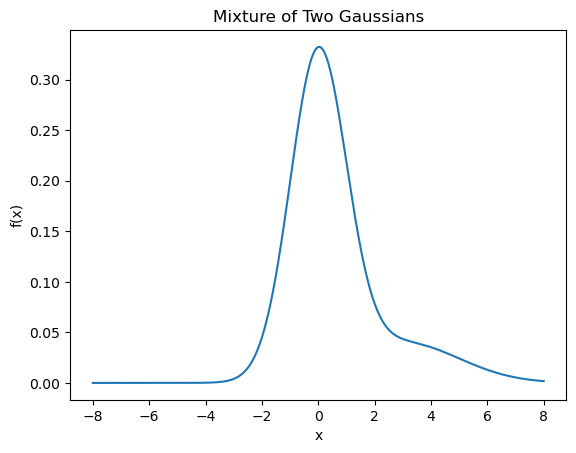

In [63]:
# Declare number of points 
NUM_POINTS = 1000
UPPER_BOUNDARY = 8
LOWER_BOUNDARY = -8

# Main function
def main():
    
    # Get the data
    x = np.linspace(LOWER_BOUNDARY, UPPER_BOUNDARY, NUM_POINTS)    
    data = CalculateMixedGaussian(x)    

    # Plot the data
    plt.plot(x, data, label='Gaussian')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Mixture of Two Gaussians')

# Call main
if __name__ == "__main__":
    main()

#### 2.



In [65]:
# Get the data
x = np.linspace(LOWER_BOUNDARY, UPPER_BOUNDARY, NUM_POINTS)    
data = CalculateMixedGaussian(x)   

# Since the mean of the distrobution is area under the curve, we can use 
# Numpy's intrgration techniques to solve
# In this case, we will use the trapezoidal integration function
mean = np.trapz(x * data, x)

# We can now use the newly calculated mean to find the variance
# where variance is the area under the curve going away from the mean
# in standard deviations
variance = np.trapz((x - mean)**2 * data, x)
print(f"The mean of the mixed Gaussian distrobution is: {mean} and the variance is: {variance}")


The mean of the mixed Gaussian distrobution is: 0.5892625750804477 and the variance is: 2.9590660483216915


#### 3.

In [78]:
# Take a millio samples
NUM_SAMPLES = 1000000

# We can use np random choice to find samples
# We need to utilize the 'p' flag to show how each sample distorbution is different
# and that each probability needs to reflect the distrobution and not be uniform

# To do this, we can calculate the prob of the sample as each data point divided by the total of points
p = data/np.sum(data)

# Set the flags
samples = np.random.choice(x, size=NUM_SAMPLES, p=p)

#### 4.

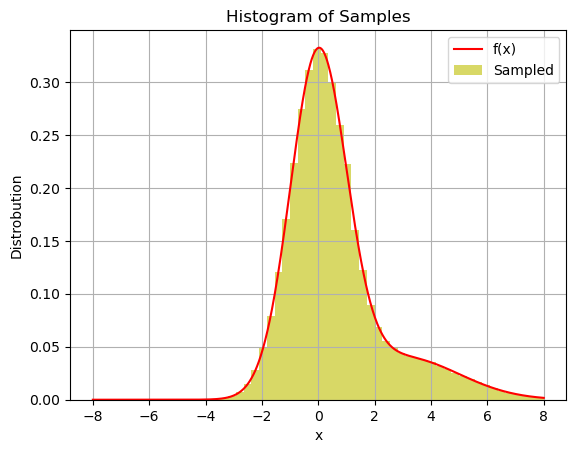

In [82]:
# Plot the data 
plt.hist(samples, bins=50, density=True, alpha=0.6, color='y', label='Sampled')
plt.grid(True)
plt.plot(x, data, 'r', label='f(x)')
plt.xlabel('x')
plt.ylabel('Distrobution')
plt.title('Histogram of Samples')
plt.legend()
plt.show()

#### 5. 

In [85]:

# Get the samples and variances 
mean_samples = np.mean(samples)
variance_samples = np.var(samples)
print(f"Mean of samples: {mean_samples}")
print(f"Variance of samples: {variance_samples}")
print("Exactly the same as beforehand!")

Mean of samples: 0.5889342142142144
Variance of samples: 2.962430790363658
Exactly the same as beforehand!


### Problem 2 [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem)

#### "Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the other doors, opens another door, say No. 3, which has a goat. He then says to you, 'Do you want to pick door No. 2?' Is it to your advantage to take the switch?" 
Note that we assume the host knows which door the car is behind and will not reveal the location of the car until after the contestant has had the opportunity to switch doors. Say you get reward = 1 for winning the car and reward = 0 otherwise, run this game 1000 times and
1. Plot your average rewards at each time if you always switch; (5 pts)
2. Plot your average rewards at each time if you never switch. (5 pts)


Total of 10 points

In [86]:
# Import libraries 
import random 

In [181]:
# Build a Monty Hall Simulation

'''
First function randomly chooses a door and then asks player to keep choice or switch
The door with the prize is ALWAYS door 1
ARGS: Bool if the user switches or not
Return: door chosen if correct
'''
NUM_DOORS = 3

def play_game(player_switches: bool):

    # Select random door
    door_chosen = random.randint(1, NUM_DOORS)
    available_doors = []
    
    # If the user switches doors reveal a goat door
    # which are always doors 2 and 3
    if player_switches:

        # Show goat
        if(door_chosen == 2):
            revealed_door = 3 
        else:
            revealed_door = 2

        # Find available doors 
        for door in range(1, NUM_DOORS+1):
            if door not in (door_chosen, revealed_door):
                available_doors.append(door)

        # Choose door 
        door_chosen = random.choice(available_doors)
    
    return door_chosen == True

'''
This function simulates the trials based on whether the user sets a switch to be true or not
ARGS: Number of trials and if the player switches or not
Return: number of wins
'''
def simulate(num_trials, player_switches: bool):
    trend = [] # List to keep track of wins over time 
    wins = 0
    for _ in range(num_trials):
        if play_game(player_switches):
            wins += 1    
        trend.append(wins)
    return wins , trend

#### 1.

In [189]:
NUM_TRIALS = 1000

# Player switches every time so we set switch flag to true
wins_with_switching , switch_trend = simulate(NUM_TRIALS, True)
print(f"With switching every time, win percentage is: {wins_with_switching}")

With switching every time, win percentage is: 661


#### 2.

In [190]:
NUM_TRIALS = 1000

# Player switches every time so we set switch flag to false
wins_without_switching , no_switch_trend = simulate(NUM_TRIALS, False)
print(f"With NOT switching every time, win percentage is: {wins_without_switching}")

With NOT switching every time, win percentage is: 342


<Figure size 640x480 with 0 Axes>

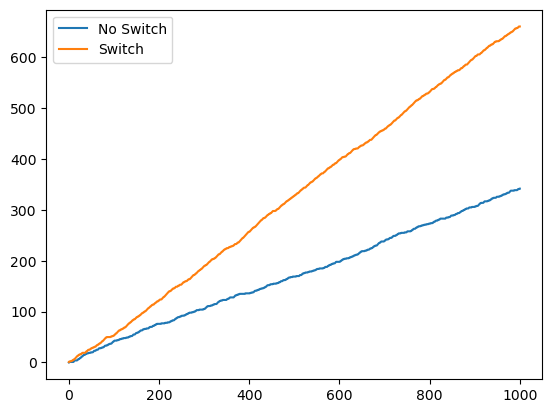

In [193]:
# Plot results 
fig = plt.figure()
x = np.linspace(0, 1000, 1000)
fig, ax = plt.subplots()
ax.plot(x, no_switch_trend, label='No Switch')
ax.plot(x, switch_trend, label='Switch')
ax.legend()